# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Logistic Regression}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [80]:
import numpy as np
import matplotlib.pyplot as plt

## $\color{deepskyblue}{\text{Functions}}$
We used the following functions to calculate accuracy and generate circular data based on the problem description. The latter function takes the boundary radius and center coordinates of the circle and generates uniformly distributed random data within two circles with radius equal to the given boundary radius.

In [81]:
def accuracy_score(y_test, y_pred):
    accuracy = sum(y_test.squeeze() == y_pred.squeeze()) / len(y_test)
    return accuracy
def make_cir_data(radius1,radius2,x_center,y_center,N):
  theta = np.random.uniform(0,2*np.pi,N)
  radius = np.random.uniform(radius1,radius2,N)
  x = x_center + (radius * np.cos(theta))
  y = y_center + (radius * np.sin(theta))
  return x, y

## $\color{deepskyblue}{\text{Logostic Regression Class}}$
This class is particularly useful for binary classification problems where the target values are either 0 or 1. It creates polynomial features up to a specified degree, scales the input data, and performs batch gradient descent to find the optimal parameters for the logistic regression model. The model can then be used to make predictions on new input data. We decribe some of its methods:

$transform$ : transforms the input data X into polynomial features up to the specified degree.

$batch\_ gradient\_ descent$ : method that performs batch gradient descent on the input data X and target values y to find the optimal parameters 

$transform$ : A method that fits the logistic regression model to the input data X and target values y.

In [82]:
class LogisticRegression():
  def __init__(self, degree, learning_rate, iterations, Lambda):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.Lambda = Lambda
        
  def transform(self, X):
    X_transformed = []
    for i in range(1, self.degree + 1):
        for j in range(i + 1):
            power_x1 = i - j
            power_x2 = j
            X_transformed.append((X[:, 0]**power_x1) * (X[:, 1]**power_x2))
    return np.array(X_transformed).T
    
  def sigmoid(self, z):
      return 1 / (1 + np.exp(-z))
      
  def h_theta(self, X, theta):
      z = X.dot(theta)
      return self.sigmoid(z)

  def scale_features(self, X):
      mean = np.mean(X, axis=0)
      sd = np.std(X, axis=0)
      X_scaled = (X - mean) / sd
      return X_scaled

  def batch_gradient_descent(self, X, y):
      m, n = X.shape
      theta = np.zeros((n, 1))
      for i in range(self.iterations):
          gradients = 1 / m * (X.T.dot(self.h_theta(X, theta) - y) + self.Lambda * theta)
          theta -= self.learning_rate * gradients
      return theta

  def fit(self, X, y):
      X_transformed = self.transform(X)
      X_scaled = self.scale_features(X_transformed)
      X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
      y = y.reshape(-1, 1)
      self.theta = self.batch_gradient_descent(X, y)
      
  def predict(self, X):
      X_transformed = self.transform(X)
      X_scaled = self.scale_features(X_transformed)
      X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
      y_pred = np.where(self.h_theta(X, self.theta) > 0.5, 1, 0)
      return y_pred.ravel()

# $\color{deepskyblue}{\text{Case 1}}$
## $\color{deepskyblue}{\text{Plot the Generated Points}}$

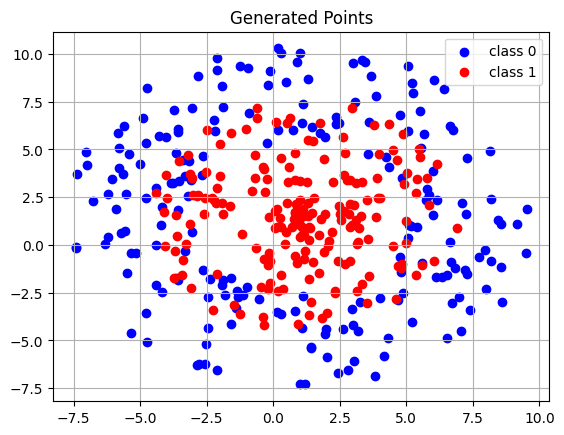

In [83]:
x1, y1 = make_cir_data(4,9,1,1.5,200)
x2, y2 = make_cir_data(0,6,1,1.5,200)
plt.scatter(x1, y1, color='b', label="class 0")
plt.scatter(x2, y2, color='r', label="class 1")
plt.title("Generated Points")
plt.legend()
plt.grid()
plt.show()

## $\color{deepskyblue}{\text{Model Fitting (Without Transform)}}$

In [84]:
X = np.transpose(np.array([np.concatenate([x1, x2]), np.concatenate([y1, y2])]))
y = np.transpose(np.array(np.concatenate([np.ones(x1.shape[0]), np.zeros(x2.shape[0])])))
model_wt1 = LogisticRegression(1, 0.01, 100000, 0.001)
model_wt1.fit(X, y)
y_pred = model_wt1.predict(X)
print('accuracy:', accuracy_score(y, y_pred))

accuracy: 0.56


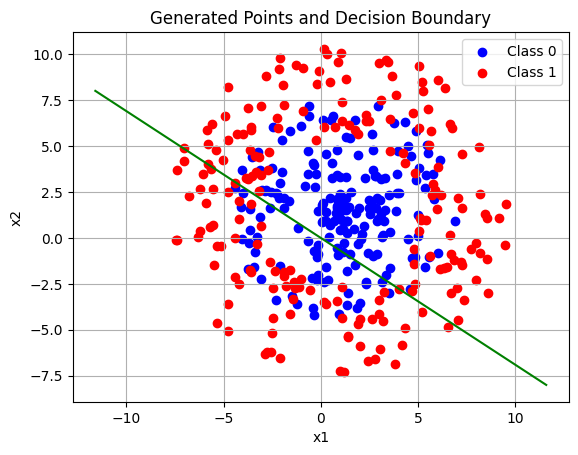

In [85]:
x1grid = np.linspace(-8, 8, 200)
x2grid = np.linspace(-8, 8, 200)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label = 'Class 1')
plt.plot(x1grid * model_wt1.theta[1]/model_wt1.theta[2] + model_wt1.theta[0] * 1/model_wt1.theta[2], x2grid, color='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("Generated Points and Decision Boundary")
plt.grid()
plt.show()

## $\color{deepskyblue}{\text{Model Fitting (Transform Data to High-Dimensional)}}$

In [86]:
x1, y1 = make_cir_data(4,9,1,1.5,200)
x2, y2 = make_cir_data(0,6,1,1.5,200)
X = np.transpose(np.array([np.concatenate([x1, x2]), np.concatenate([y1, y2])]))
y = np.transpose(np.array(np.concatenate([np.ones(x1.shape[0]), np.zeros(x2.shape[0])])))
model_t1 = LogisticRegression(7, 0.01, 100000, 0.001)
model_t1.fit(X, y)
y_pred = model_t1.predict(X)
print('accuracy:', accuracy_score(y, y_pred))

accuracy: 0.835


### $\color{deepskyblue}{\text{Logistic Regression Boundary}}$

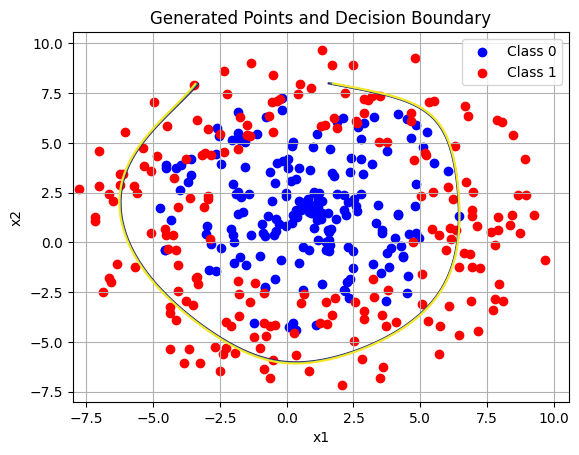

In [87]:
x1grid = np.linspace(-8, 8, 200)
x2grid = np.linspace(-8, 8, 200)
x1, x2 = np.meshgrid(x1grid, x2grid)
x1 = x1.flatten()
x2 = x2.flatten()
x1 = x1.reshape((len(x1), 1))
x2 = x2.reshape((len(x2), 1))
grid = np.hstack((x1, x2))
X_poly = model_t1.transform(grid)
X_poly = model_t1.scale_features(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
Z = X_poly.dot(model_t1.theta)
U = x1.reshape((len(x1grid), len(x2grid)))
V = x2.reshape((len(x1grid), len(x2grid)))
Z = Z.reshape((len(x1grid), len(x2grid)))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label = 'Class 1')
plt.contour(U, V, Z, levels = [0.45, 0.5, 0.55])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("Generated Points and Decision Boundary")
plt.grid()
plt.show()

# $\color{deepskyblue}{\text{Case 2}}$
## $\color{deepskyblue}{\text{Plot the Generated Points}}$

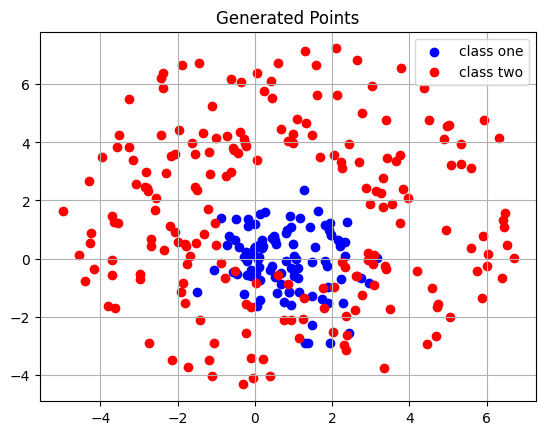

In [88]:
x1, y1 = np.random.normal(1,1,100), np.random.normal(0,1,100)
x2, y2 = make_cir_data(2,6,1,1.5,200)
plt.scatter(x1, y1, color='b', label="class one")
plt.scatter(x2, y2, color='r', label="class two")
plt.title("Generated Points")
plt.legend()
plt.grid()
plt.show()

## $\color{deepskyblue}{\text{Model Fitting (Without Transform)}}$

In [89]:
X = np.transpose(np.array([np.concatenate([x1, x2]), np.concatenate([y1, y2])]))
y = np.transpose(np.array(np.concatenate([np.ones(x1.shape[0]), np.zeros(x2.shape[0])])))
model_wt2 = LogisticRegression(1, 0.01, 100000, 0.001)
model_wt2.fit(X, y)
y_pred = model_wt2.predict(X)
print('accuracy:', accuracy_score(y, y_pred))

accuracy: 0.5866666666666667


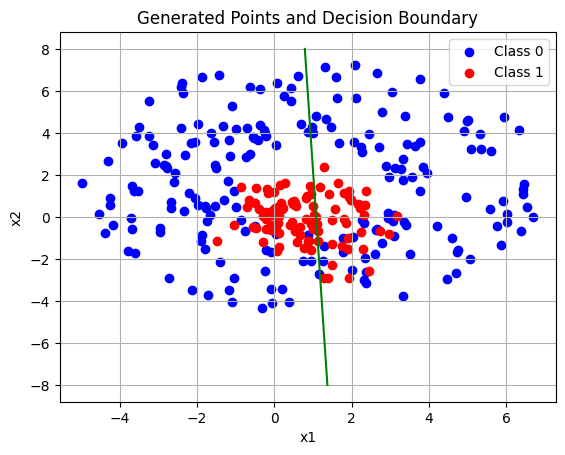

In [90]:
x1grid = np.linspace(-8, 8, 200)
x2grid = np.linspace(-8, 8, 200)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label = 'Class 1')
plt.plot(x1grid * model_wt2.theta[1]/model_wt2.theta[2] + model_wt2.theta[0] * 1/model_wt2.theta[2], x2grid, color='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("Generated Points and Decision Boundary")
plt.grid()
plt.show()

## $\color{deepskyblue}{\text{Model Fitting (Transform Data to High-Dimensional)}}$

In [91]:
x1, y1 = np.random.normal(1,1,100), np.random.normal(0,1,100)
x2, y2 = make_cir_data(2,6,1,1.5,200)
X = np.transpose(np.array([np.concatenate([x1, x2]), np.concatenate([y1, y2])]))
y = np.transpose(np.array(np.concatenate([np.ones(x1.shape[0]), np.zeros(x2.shape[0])])))
model_t2 = LogisticRegression(7, 0.01, 100000, 0.001)
model_t2.fit(X, y)
y_pred = model_t2.predict(X)
print('accuracy:', accuracy_score(y, y_pred))

accuracy: 0.92


### $\color{deepskyblue}{\text{Logistic Regression Boundary}}$

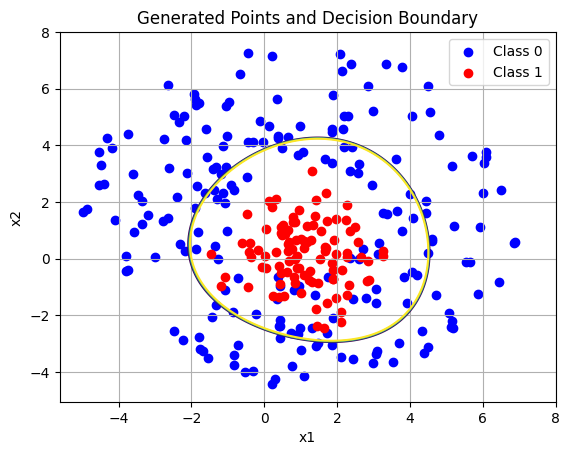

In [92]:
x1grid = np.linspace(-4, 8, 200)
x2grid = np.linspace(-4, 8, 200)
x1, x2 = np.meshgrid(x1grid, x2grid)
x1 = x1.flatten()
x2 = x2.flatten()
x1 = x1.reshape((len(x1), 1))
x2 = x2.reshape((len(x2), 1))
grid = np.hstack((x1, x2))
X_poly = model_t2.transform(grid)
X_poly = model_t2.scale_features(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
Z = X_poly.dot(model_t2.theta)
U = x1.reshape((len(x1grid), len(x2grid)))
V = x2.reshape((len(x1grid), len(x2grid)))
Z = Z.reshape((len(x1grid), len(x2grid)))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label = 'Class 1')
plt.contour(U, V, Z, levels = [0.45, 0.5, 0.55])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("Generated Points and Decision Boundary")
plt.grid()
plt.show()